#Метрики оценки качества ответов модели GigaChat + RAG + self-asking


In [87]:
!pip install gspread -q
!pip install pandas -q
!pip install rouge_score -q

In [88]:
from getpass import getpass
import gspread
import pandas as pd

In [89]:
parh_to_jsom = getpass(prompt='Введите путь к json файлу доступа к таблице')

table_key = getpass(prompt='Введите ключ доступа к Google таблице')

Введите путь к json файлу доступа к таблице··········
Введите ключ доступа к Google таблице··········


In [90]:
# Авторизация в аккаунт Google и открытие таблицы
client = gspread.service_account(filename=parh_to_jsom)
table = client.open_by_key(table_key)
worksheet = table.worksheet('FAQ КИИ УЦСБ')

##ROUGE

In [91]:
import warnings
warnings.filterwarnings('ignore')

from rouge_score import rouge_scorer

r_scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)

In [92]:
df_ROUGE = pd.DataFrame(columns=['Без self-asking','Self-asking до вопроса', 'Self-asking после вопроса'])

df_ROUGE

,Без self-asking,Self-asking до вопроса,Self-asking после вопроса


In [93]:
meteor_score = []
for i in range(3, 23):
    row_data = worksheet.row_values(i)
    base = row_data[5]

    for k in [3, 2, 4]:
        assumption = row_data[k]
        meteor_score.append(r_scorer.score(base, assumption))

    df_ROUGE.loc[i-2] = meteor_score
    meteor_score = []

In [94]:
df_ROUGE.head(4)

,Без self-asking,Self-asking до вопроса,Self-asking после вопроса
1,"{'rougeL': (0.0, 0.0, 0.0)}","{'rougeL': (0.0, 0.0, 0.0)}","{'rougeL': (0.0, 0.0, 0.0)}"
2,"{'rougeL': (0, 0, 0)}","{'rougeL': (0, 0, 0)}","{'rougeL': (0, 0, 0)}"
3,"{'rougeL': (0, 0, 0)}","{'rougeL': (1.0, 0.8333333333333334, 0.9090909...","{'rougeL': (0.8571428571428571, 1.0, 0.9230769..."
4,"{'rougeL': (0, 0, 0)}","{'rougeL': (0.6666666666666666, 0.5, 0.5714285...","{'rougeL': (0.6666666666666666, 0.5, 0.5714285..."


In [95]:
df_ROUGE['Без self-asking'] = df_ROUGE['Без self-asking'].apply(lambda x: x['rougeL'][0])
df_ROUGE['Self-asking до вопроса'] = df_ROUGE['Self-asking до вопроса'].apply(lambda x: x['rougeL'][0])
df_ROUGE['Self-asking после вопроса'] = df_ROUGE['Self-asking после вопроса'].apply(lambda x: x['rougeL'][0])

df_ROUGE

,Без self-asking,Self-asking до вопроса,Self-asking после вопроса
1,0.00,0.000000,0.000000
2,0.00,0.000000,0.000000
3,0.00,1.000000,0.857143
4,0.00,0.666667,0.666667
5,0.00,0.500000,0.500000
6,0.00,0.000000,0.000000
7,0.25,0.076923,0.076923
8,0.00,0.000000,0.000000
9,0.00,0.000000,0.000000
10,0.00,0.000000,0.000000


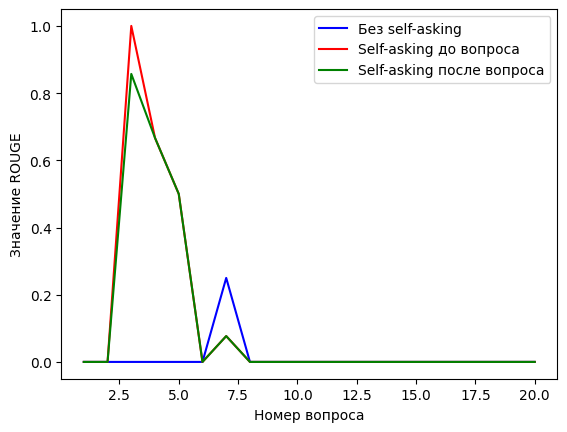

In [96]:
import matplotlib.pyplot as plt
import pandas as pd

plt.plot(df_ROUGE.index, df_ROUGE.loc[:, 'Без self-asking'], label='Без self-asking', color='blue')
plt.plot(df_ROUGE.index, df_ROUGE.loc[:, 'Self-asking до вопроса'], label='Self-asking до вопроса', color='red')
plt.plot(df_ROUGE.index, df_ROUGE.loc[:, 'Self-asking после вопроса'], label='Self-asking после вопроса', color='green')

# Подписи осей
plt.xlabel('Номер вопроса')
plt.ylabel('Значение ROUGE')

# Добавление легенды и отображение
plt.legend()
plt.show()

Чем больше значение ROUGE, то есть чем выше идет линия графика, тем лучше ответ модели

In [ ]:
sum = []
label = ["Без self-asking",	"Self-asking до вопроса", "Self-asking после вопроса"]
for column in df_ROUGE.columns:
    # Складываем значения в столбце
    sum.append(df_ROUGE[column].sum().round(4))

for x in range(len(sum)):
    sum[x] = round(sum[x]/len(df_ROUGE), 4)
    print(f"{label[x]}: {sum[x]}")

Без self-asking: 0.0125
Self-asking до вопроса: 0.1122
Self-asking после вопроса: 0.105


Видим, что наилучшие показатели имеет модель с Self-asking до вопроса